In [31]:
import warnings

# Filter specific warning
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_org = pd.read_csv('../Dataset/players_19.csv')
df_org = df_org.head(10000)

col = ['Overall', 'Potential', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'FKAccuracy', 'Value']
df = df_org[col]

df.columns = ['Overall', 'Potential', 'Wage', 'Special', 'InternationalReputation', 'SkillMoves', 'FKAccuracy', 'Value']

In [3]:
# Changing the format of several string variabls
val = []
for i in df['Value']:
    if i[-1] == 'M':
        val.append(float(i[1:-1]) * 1000000)
    elif i[-1] == 'K':
        val.append(float(i[1:-1]) * 1000)
    else:
        val.append(0)
df.loc[:, 'Value'] = val

val = []
for i in df['Wage']:
    if i[-1] == 'M':
        val.append(float(i[1:-1]) * 1000000)
    elif i[-1] == 'K':
        val.append(float(i[1:-1]) * 1000)
    else:
        val.append(0)
df.loc[:, 'Wage'] = val

df.rename({'Value': 'y'}, axis=1, inplace=True)

In [4]:
df['y'] = df['y'] / 10000
df['Wage'] = df['Wage'] / 1000

In [5]:
df.head()

,Overall,Potential,Wage,Special,InternationalReputation,SkillMoves,FKAccuracy,y
0,94.0,94,565.0,2202,5.0,4.0,94.0,11050.0
1,94.0,94,405.0,2228,5.0,5.0,76.0,7700.0
2,92.0,93,290.0,2143,5.0,5.0,87.0,11850.0
3,91.0,93,260.0,1471,4.0,1.0,19.0,7200.0
4,91.0,92,355.0,2281,4.0,4.0,83.0,10200.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall                  9999 non-null   float64
 1   Potential                10000 non-null  int64  
 2   Wage                     10000 non-null  float64
 3   Special                  10000 non-null  int64  
 4   InternationalReputation  10000 non-null  float64
 5   SkillMoves               10000 non-null  float64
 6   FKAccuracy               10000 non-null  float64
 7   y                        10000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 625.1 KB


## Train Test split

In [7]:
missing_values = df.isna().sum()
print(missing_values)
df = df.dropna()

Overall                    1
Potential                  0
Wage                       0
Special                    0
InternationalReputation    0
SkillMoves                 0
FKAccuracy                 0
y                          0
dtype: int64


In [8]:
# Assuming df is your DataFrame with player parameters and salary
correlation_matrix = df.corr()
print(correlation_matrix['y'])  # 'y' represents the column with salaries

Overall                    0.792083
Potential                  0.663401
Wage                       0.841321
Special                    0.337658
InternationalReputation    0.625580
SkillMoves                 0.264886
FKAccuracy                 0.207422
y                          1.000000
Name: y, dtype: float64


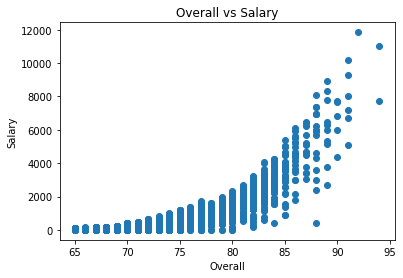

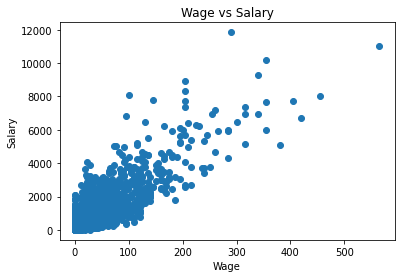

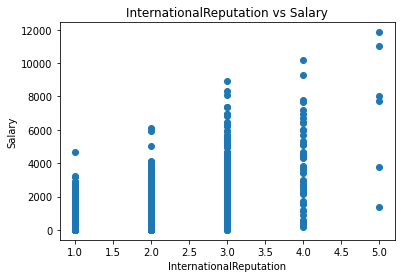

In [170]:
import matplotlib.pyplot as plt

# Plotting a scatter plot for 'Age' and 'Wage' columns (you can change these to relevant columns)
plt.scatter(df['Overall'], df['y'])  # 'y' represents the column with salaries
plt.xlabel('Overall')
plt.ylabel('Salary')
plt.title('Overall vs Salary')
plt.show()
print()

plt.scatter(df['Wage'], df['y'])  # 'y' represents the column with salaries
plt.xlabel('Wage')
plt.ylabel('Salary')
plt.title('Wage vs Salary')
plt.show()
print()

plt.scatter(df['InternationalReputation'], df['y'])  # 'y' represents the column with salaries
plt.xlabel('InternationalReputation')
plt.ylabel('Salary')
plt.title('InternationalReputation vs Salary')
plt.show()

In [13]:
Y = copy.deepcopy(df['y'])
X = df.drop('y', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [10]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8999, 7)
Training Labels Shape: (8999,)
Testing Features Shape: (1000, 7)
Testing Labels Shape: (1000,)


## GradientBoostingRegressor

In [147]:
# Create the regressor
gb_regressor = GradientBoostingRegressor(max_depth=10)

# Fit the model using your training data
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=10)

In [148]:
# Predict using the testing features
predictions = gb_regressor.predict(x_test)

In [149]:


# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)  # Setting squared=False returns RMSE

print(f"Mean Absolute Error (MAE): {mae:.2f} dollars.")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 58.24 dollars.
Root Mean Squared Error (RMSE): 176.09


In [156]:
print(y_test[:5].to_numpy())
print()
print(np.round(predictions[:5]))

[ 65. 240. 900. 230. 210.]

[ 69. 158. 873. 148. 214.]


## LinearRegression

In [99]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression(normalize=False)

# Fitting the model
model.fit(x_train, y_train)

LinearRegression()

In [162]:
predictions = abs(model.predict(x_test[:1000]))

In [163]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)  # Setting squared=False returns RMSE

# measures the average absolute percentage difference between predicted and actual values.
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100 % 100

print(f"Mean Absolute Error (MAE): {mae:.2f} dollars.")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 139.49 dollars.
Root Mean Squared Error (RMSE): 261.11


In [164]:
print(y_test[:5].to_numpy())
print()
print(np.round(predictions[:5]))

[ 65. 240. 900. 230. 210.]

[ 89. 424. 701. 232. 162.]


## KNeighborsRegressor

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [28]:
import numpy as np

class CustomKNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = []
            for train_point in self.X_train:
                # Обчислення Евклідової відстані між точками
               # print(test_point, train_point)
                distance = np.linalg.norm(test_point - train_point)
                distances.append(distance)

            # Сортуємо індекси згідно з відстанями та вибираємо k найближчих сусідів
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Обчислення середнього значення для k найближчих сусідів
            k_nearest_neighbors = self.y_train[k_nearest_indices]
            prediction = np.mean(k_nearest_neighbors)
            predictions.append(prediction)

        return np.array(predictions)


In [29]:

model = CustomKNNRegressor(k=5)
model.fit(x_train, y_train)
predictions = model.predict(x_test[:1000])

In [32]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)  # Setting squared=False returns RMSE

# measures the average absolute percentage difference between predicted and actual values.
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100 % 100

print(f"Mean Absolute Error (MAE): {mae:.2f} dollars.")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 139.91 dollars.
Root Mean Squared Error (RMSE): 297.13


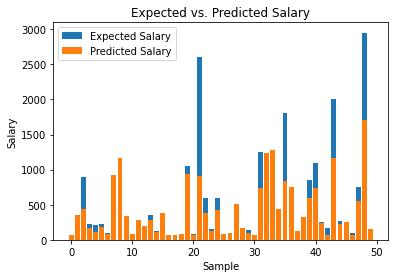

In [43]:
import matplotlib.pyplot as plt

categories = ['Low', 'Medium', 'High']
y_test_categories = pd.cut(y_test[:50], bins=3, labels=categories)

plt.figure()
plt.bar(range(len(y_test_categories)), y_test[:50],  label='Expected Salary')
plt.bar(range(len(predictions[:50])), predictions[:50], label='Predicted Salary')
plt.xlabel('Sample')
plt.ylabel('Salary')
plt.title('Expected vs. Predicted Salary')
plt.legend()
plt.show()
